In [1]:
import pandas as pd

In [10]:
df = pd.read_csv("fireData.csv")

/Users/muthu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.head()

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [12]:
df.shape

(1880465, 40)

In [15]:
df.isnull().sum()

Unnamed: 0                          0
OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555741
FIRE_NAME                      960479
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE   

0          BJ8K
1          AAC0
2          A32W
3           NaN
4           NaN
           ... 
1880460     NaN
1880461     NaN
1880462     NaN
1880463     NaN
1880464     NaN
Name: FIRE_CODE, Length: 1880465, dtype: object

In [25]:
df.FIRE_YEAR.unique

<bound method Series.unique of 0          2005
1          2004
2          2004
3          2004
4          2004
           ... 
1880460    2015
1880461    2015
1880462    2015
1880463    2015
1880464    2015
Name: FIRE_YEAR, Length: 1880465, dtype: int64>

In [26]:
df.DISCOVERY_DATE

0          2453403.5
1          2453137.5
2          2453156.5
3          2453184.5
4          2453184.5
             ...    
1880460    2457291.5
1880461    2457300.5
1880462    2457144.5
1880463    2457309.5
1880464    2457095.5
Name: DISCOVERY_DATE, Length: 1880465, dtype: float64

In [33]:
jdates = df.DISCOVERY_DATE

In [35]:
epoch = pd.to_datetime(0, unit='s').to_julian_date()
rdates = pd.to_datetime(jdates - epoch, unit='D')

In [37]:
df.columns

Index(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [43]:
dropcols = ["SOURCE_SYSTEM_TYPE", "SOURCE_SYSTEM", "NWCG_REPORTING_AGENCY",
            "NWCG_REPORTING_UNIT_ID", "NWCG_REPORTING_UNIT_NAME", 
             "SOURCE_REPORTING_UNIT", "SOURCE_REPORTING_UNIT_NAME", 
             "FIRE_CODE", "FIRE_NAME", "LOCAL_FIRE_REPORT_ID", "LOCAL_INCIDENT_ID", 
             "MTBS_FIRE_NAME", "ICS_209_INCIDENT_NUMBER", "ICS_209_NAME", 
             "MTBS_ID", "COMPLEX_NAME", "CONT_TIME", "Unnamed: 0", "OBJECTID", "FPA_ID"]
smaller_df = df.drop(dropcols, axis=1)

In [44]:
smaller_df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [45]:
ddates = smaller_df["DISCOVERY_DATE"]
cdates = smaller_df["CONT_DATE"]
smaller_df["DISCOVERY_DATE"] = pd.to_datetime(ddates - epoch, unit='D')
smaller_df["CONT_DATE"] = pd.to_datetime(cdates - epoch, unit='D')

In [46]:
smaller_df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,2005,2005-02-02,33,1300.0,9.0,Miscellaneous,2005-02-02,33.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2004,2004-05-12,133,845.0,1.0,Lightning,2004-05-12,133.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,2004,2004-05-31,152,1921.0,5.0,Debris Burning,2004-05-31,152.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,2004,2004-06-28,180,1600.0,1.0,Lightning,2004-07-03,185.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,2004,2004-06-28,180,1600.0,1.0,Lightning,2004-07-03,185.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [48]:
smaller_df = smaller_df.drop("Shape", axis=1)

In [49]:
smaller_df

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,2005,2005-02-02,33,1300.0,9.0,Miscellaneous,2005-02-02,33.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas
1,2,2004,2004-05-12,133,845.0,1.0,Lightning,2004-05-12,133.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer
2,3,2004,2004-05-31,152,1921.0,5.0,Debris Burning,2004-05-31,152.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado
3,4,2004,2004-06-28,180,1600.0,1.0,Lightning,2004-07-03,185.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine
4,5,2004,2004-06-28,180,1600.0,1.0,Lightning,2004-07-03,185.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,300348363,2015,2015-09-26,269,1726.0,13.0,Missing/Undefined,2015-09-26,269.0,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,NaN,NaN,NaN
1880461,300348373,2015,2015-10-05,278,126.0,9.0,Miscellaneous,NaT,NaN,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN
1880462,300348375,2015,2015-05-02,122,2052.0,13.0,Missing/Undefined,NaT,NaN,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN
1880463,300348377,2015,2015-10-14,287,2309.0,13.0,Missing/Undefined,NaT,NaN,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN


In [50]:
smallest_df = smaller_df.dropna()

In [52]:
smallest_df.shape

(597998, 19)

In [53]:
smallest_df.to_csv("finalFires.csv")

In [55]:
import seaborn as sns
sns.pairplot(smallest_df)

In [58]:
smallest_df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,2005,2005-02-02,33,1300.0,9.0,Miscellaneous,2005-02-02,33.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas
1,2,2004,2004-05-12,133,845.0,1.0,Lightning,2004-05-12,133.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer
2,3,2004,2004-05-31,152,1921.0,5.0,Debris Burning,2004-05-31,152.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado
3,4,2004,2004-06-28,180,1600.0,1.0,Lightning,2004-07-03,185.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine
4,5,2004,2004-06-28,180,1600.0,1.0,Lightning,2004-07-03,185.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine


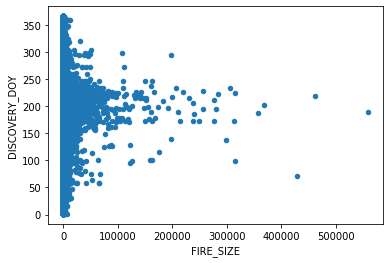

In [59]:
smallest_df.plot.scatter(x="FIRE_SIZE", y="DISCOVERY_DOY")

In [62]:
smallest_df["FIRE_SIZE"].value_counts()

0.10        166526
1.00         47621
0.50         27366
2.00         25968
0.20         16846
             ...  
2679.60          1
10720.60         1
75.24            1
149.60           1
13654.90         1
Name: FIRE_SIZE, Length: 9042, dtype: int64

In [65]:
smallest_df["FIPS_NAME"].value_counts()

Coconino     7750
Lincoln      7661
Suffolk      6294
Monroe       5780
Riverside    5342
             ... 
Kidder          1
Alfalfa         1
Austin          1
Windsor         1
Codington       1
Name: FIPS_NAME, Length: 1569, dtype: int64

In [67]:
smallest_df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,2005,2005-02-02,33,1300.0,9.0,Miscellaneous,2005-02-02,33.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas
1,2,2004,2004-05-12,133,845.0,1.0,Lightning,2004-05-12,133.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer
2,3,2004,2004-05-31,152,1921.0,5.0,Debris Burning,2004-05-31,152.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado
3,4,2004,2004-06-28,180,1600.0,1.0,Lightning,2004-07-03,185.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine
4,5,2004,2004-06-28,180,1600.0,1.0,Lightning,2004-07-03,185.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine


In [81]:
model_df = smallest_df.drop(["FOD_ID", "STAT_CAUSE_DESCR", "DISCOVERY_DATE", "CONT_DATE", "FIRE_SIZE", "OWNER_DESCR", "COUNTY", "FIPS_NAME"], axis=1)

In [82]:
model_df.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,CONT_DOY,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,STATE,FIPS_CODE
0,2005,33,1300.0,9.0,33.0,A,40.036944,-121.005833,5.0,CA,63.0
1,2004,133,845.0,1.0,133.0,A,38.933056,-120.404444,5.0,CA,61.0
2,2004,152,1921.0,5.0,152.0,A,38.984167,-120.735556,13.0,CA,17.0
3,2004,180,1600.0,1.0,185.0,A,38.559167,-119.913333,5.0,CA,3.0
4,2004,180,1600.0,1.0,185.0,A,38.559167,-119.933056,5.0,CA,3.0


In [79]:
model_df = pd.get_dummies(model_df)

In [83]:
model_df.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,CONT_DOY,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,STATE,FIPS_CODE
0,2005,33,1300.0,9.0,33.0,A,40.036944,-121.005833,5.0,CA,63.0
1,2004,133,845.0,1.0,133.0,A,38.933056,-120.404444,5.0,CA,61.0
2,2004,152,1921.0,5.0,152.0,A,38.984167,-120.735556,13.0,CA,17.0
3,2004,180,1600.0,1.0,185.0,A,38.559167,-119.913333,5.0,CA,3.0
4,2004,180,1600.0,1.0,185.0,A,38.559167,-119.933056,5.0,CA,3.0


In [72]:
model_df.to_csv("ModelFires.csv")

In [84]:
from sklearn.model_selection import train_test_split
X = model_df.drop(['FIRE_SIZE_CLASS'], axis=1)
y = model_df[['FIRE_SIZE_CLASS']]


In [85]:
X = pd.get_dummies(X)
X.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,CONT_DOY,LATITUDE,LONGITUDE,OWNER_CODE,FIPS_CODE,STATE_AK,...,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,2005,33,1300.0,9.0,33.0,40.036944,-121.005833,5.0,63.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2004,133,845.0,1.0,133.0,38.933056,-120.404444,5.0,61.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2004,152,1921.0,5.0,152.0,38.984167,-120.735556,13.0,17.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,180,1600.0,1.0,185.0,38.559167,-119.913333,5.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2004,180,1600.0,1.0,185.0,38.559167,-119.933056,5.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(418598, 60)
(179400, 60)
(418598, 1)
(179400, 1)


In [88]:
X["LONGITUDE"] = -1*X["LONGITUDE"]

In [90]:
X.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,CONT_DOY,LATITUDE,LONGITUDE,OWNER_CODE,FIPS_CODE,STATE_AK,...,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,2005,33,1300.0,9.0,33.0,40.036944,121.005833,5.0,63.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2004,133,845.0,1.0,133.0,38.933056,120.404444,5.0,61.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2004,152,1921.0,5.0,152.0,38.984167,120.735556,13.0,17.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,180,1600.0,1.0,185.0,38.559167,119.913333,5.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2004,180,1600.0,1.0,185.0,38.559167,119.933056,5.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X.to_csv("X.csv")

In [107]:
y.to_csv("y.csv")

In [108]:
y.head()

,FIRE_SIZE_CLASS
0,A
1,A
2,A
3,A
4,A


In [94]:
(X < 0).any()

FIRE_YEAR          False
DISCOVERY_DOY      False
DISCOVERY_TIME     False
STAT_CAUSE_CODE    False
CONT_DOY           False
LATITUDE           False
LONGITUDE          False
OWNER_CODE         False
FIPS_CODE          False
STATE_AK           False
STATE_AL           False
STATE_AR           False
STATE_AZ           False
STATE_CA           False
STATE_CO           False
STATE_CT           False
STATE_DE           False
STATE_FL           False
STATE_GA           False
STATE_HI           False
STATE_IA           False
STATE_ID           False
STATE_IL           False
STATE_IN           False
STATE_KS           False
STATE_KY           False
STATE_LA           False
STATE_MA           False
STATE_MD           False
STATE_ME           False
STATE_MI           False
STATE_MN           False
STATE_MO           False
STATE_MS           False
STATE_MT           False
STATE_NC           False
STATE_ND           False
STATE_NE           False
STATE_NH           False
STATE_NJ           False


In [96]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=1.0)
classifier.fit(X_train,y_train)

/Users/muthu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [97]:
ypred = classifier.predict(X_test)

In [100]:
from sklearn import metrics
print(metrics.classification_report(y_test,ypred))
print(metrics.confusion_matrix(y_test,ypred))

              precision    recall  f1-score   support

           A       0.54      0.29      0.38     70230
           B       0.57      0.17      0.26     83532
           C       0.17      0.54      0.26     20210
           D       0.02      0.02      0.02      2716
           E       0.01      0.00      0.01      1377
           F       0.00      0.08      0.01       861
           G       0.01      0.54      0.01       474

    accuracy                           0.25    179400
   macro avg       0.19      0.23      0.13    179400
weighted avg       0.50      0.25      0.30    179400

[[20369  8500 15137   837   144  5682 19561]
 [13457 14000 36056   918   314  7789 10998]
 [ 2569  1877 10932   289   134  1934  2475]
 [  469   193  1089    43     8   270   644]
 [  303   100   383    22     6   134   429]
 [  204    59   118    10     7    71   392]
 [  118    33    40     3     1    25   254]]


In [102]:
from sklearn.naive_bayes import BernoulliNB

classifier_ber = BernoulliNB(alpha=1.0)
classifier_ber.fit(X_train,y_train)


ypred_ber = classifier_ber.predict(X_test)
print(metrics.classification_report(y_test,ypred_ber))
print(metrics.confusion_matrix(y_test,ypred_ber))

/Users/muthu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/muthu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           A       0.61      0.74      0.67     70230
           B       0.60      0.68      0.64     83532
           C       0.00      0.00      0.00     20210
           D       0.00      0.00      0.00      2716
           E       0.17      0.00      0.00      1377
           F       0.00      0.00      0.00       861
           G       0.00      0.00      0.00       474

    accuracy                           0.61    179400
   macro avg       0.20      0.20      0.19    179400
weighted avg       0.52      0.61      0.56    179400

[[51872 18357     0     0     0     0     1]
 [26603 56926     2     0     1     0     0]
 [ 3833 16375     0     0     2     0     0]
 [ 1083  1631     0     0     2     0     0]
 [  775   601     0     0     1     0     0]
 [  656   205     0     0     0     0     0]
 [  419    55     0     0     0     0     0]]


In [105]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_alphas = 100
alphas = np.logspace(-10, 5, n_alphas)
scores = []

for alpha in alphas:
    polynomial_features = PolynomialFeatures(degree=4,
                                             include_bias=False)
    scaler = MinMaxScaler()
    logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='lbfgs',fit_intercept=True,penalty='l2',max_iter=5000,
                                             multi_class='multinomial')
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("scaler", scaler),
                         ("logreg", logreg)])
    pipeline.fit(X_train, y_train)
    score = cross_val_score(pipeline, X_train, y_train,
                             scoring='accuracy', cv=10)
    scores.append(np.mean(score))

plt.semilogx(alphas,scores)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

KeyboardInterrupt: 

In [112]:
y["FIRE_SIZE_CLASS"].value_counts()

B    277718
A    234417
C     67643
D      8913
E      4696
F      3026
G      1585
Name: FIRE_SIZE_CLASS, dtype: int64

In [119]:
y.loc[:,'Threat'] = 1

In [120]:
y.loc[(y.FIRE_SIZE_CLASS == 'A'),'Threat']= 0
y.loc[(y.FIRE_SIZE_CLASS == 'B'),'Threat']= 0

In [121]:
y.head()

,FIRE_SIZE_CLASS,Threat
0,A,0
1,A,0
2,A,0
3,A,0
4,A,0


In [122]:
y['Threat'].value_counts()

0    512135
1     85863
Name: Threat, dtype: int64

In [123]:
y = y.drop(["FIRE_SIZE_CLASS"], axis=1)
y.head()

,Threat
0,0
1,0
2,0
3,0
4,0


In [131]:
y.to_csv("y_binary.csv")

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y['Threat'], test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(418598, 59)
(179400, 59)
(418598,)
(179400,)


In [157]:
alpha = 0.1


logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='liblinear',fit_intercept=True, penalty = 'l1')

logreg.fit(X_train, y_train)


print("Theta found by logistic regression with L2 reg: ", logreg.coef_[0], logreg.intercept_)

# accuracy on training set 

ypred_log = logreg.predict(X_test)
print(metrics.classification_report(y_test,ypred_log))
print(metrics.confusion_matrix(y_test,ypred_log))

Theta found by logistic regression with L2 reg:  [-1.62463764e-05 -1.47538149e-03 -8.43696057e-05  2.23277286e-02
 -4.02099348e-02  2.31903411e-04 -2.80806984e-02 -1.45874273e-04
  1.71975109e+00  1.22690281e+00  8.59784199e-01 -3.65957310e-01
 -6.13444801e-01 -6.52628015e-01 -1.85733265e+00 -2.91776767e-01
  2.03235805e-01 -6.10370038e-01  2.48802721e+00  8.99957502e-01
  7.94734712e-01  2.49288228e-01  3.61830111e-02  9.08733704e-01
  1.69060901e+00  6.18270956e-01 -1.83373424e+00 -1.81276108e-01
 -1.14340022e+00  3.65595010e-02  4.68990442e-01  1.25371872e+00
  1.04304853e+00  4.88258609e-01 -6.93788102e-01  2.11743603e+00
  1.04388692e+00 -1.07579768e-01 -2.16447900e+00  7.09421249e-02
  5.11384361e-01 -4.04187370e+00  2.83219883e-02  1.29989169e+00
 -2.55968423e-01 -3.12962670e-01 -6.42575118e-01 -1.99451647e+00
  3.83220493e-03  4.35524427e-01  5.75766971e-01  1.45863065e+00
 -1.12300300e-01  1.18182279e+00  7.88307048e-01 -1.39844176e-01
 -9.39228504e-01  7.22981688e-01  6.89360

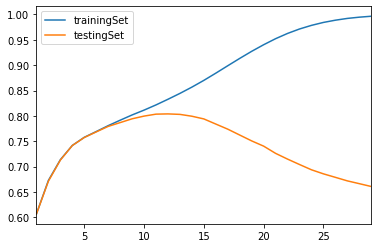

In [136]:
from sklearn import tree
from sklearn.metrics import roc_auc_score

trainingAUC = []
testAUC = []
depths = [x for x in range(1,30,1)]
for depth in depths:
    dtree = tree.DecisionTreeClassifier(max_depth=depth)
    dtree = dtree.fit(X_train, y_train)
    trainProbs = dtree.predict_proba(X_train)[:,1]
    testProbs = dtree.predict_proba(X_test)[:,1]
    trainingAUC.append(roc_auc_score(y_train, trainProbs))
    testAUC.append(roc_auc_score(y_test, testProbs))
frame = pd.DataFrame(data={'trainingSet': trainingAUC, 'testingSet': testAUC}, index=depths)
frame.plot.line()

In [137]:
def calcSpec(cfm):
    return cfm[1][1]/(cfm[1][0] + cfm[1][1])
def calcSens(cfm):
    return cfm[0][0]/(cfm[0][0] + cfm[0][1])

In [158]:
from sklearn.metrics import confusion_matrix

dtree = tree.DecisionTreeClassifier(max_depth = 11)
dtree = dtree.fit(X_train, y_train)
ypred_dtree = dtree.predict(X_test)
ytestCFM = confusion_matrix(y_test, ypred_dtree)
probs2 = dtree.predict_proba(X_test)[:,1]
print(ytestCFM)
print("Specificity: " + str(calcSpec(ytestCFM)))
print("Sensitivity: " + str(calcSens(ytestCFM)))
print ("AUC: " + str(roc_auc_score(y_test, probs2)))

[[149907   3619]
 [ 21661   4213]]
Specificity: 0.16282754889077838
Sensitivity: 0.9764274455141149
AUC: 0.7973230380947913


In [188]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 17, criterion = 'entropy')
forest = forest.fit(X_train, y_train)
ypred_forest = forest.predict(X_test)
fcfm = confusion_matrix(y_test, ypred_forest)
fprobs = forest.predict_proba(X_test)[:,1]
print(fcfm)
print("Specificity: " + str(calcSpec(fcfm)))
print("Sensitivity: " + str(calcSens(fcfm)))
print ("AUC: " + str(roc_auc_score(y_test, fprobs)))

[[148159   5367]
 [ 19062   6812]]
Specificity: 0.26327587539615055
Sensitivity: 0.9650417518856741
AUC: 0.807102886229146


In [145]:
forest.feature_importances_

array([6.58880315e-02, 1.15826771e-01, 1.31977878e-01, 4.47948104e-02,
       1.19850149e-01, 1.69131946e-01, 1.79613931e-01, 2.62154883e-02,
       8.15950754e-02, 1.22154794e-04, 5.32051484e-03, 1.22365038e-03,
       7.36938843e-04, 1.80637654e-03, 7.32729020e-04, 1.51952103e-05,
       1.84181125e-05, 8.04076492e-04, 3.53728224e-03, 1.43435868e-05,
       3.72369747e-04, 2.09897764e-03, 2.69495226e-04, 6.34350054e-05,
       6.91949960e-04, 7.82140814e-03, 2.74698758e-04, 3.67378817e-05,
       4.65256047e-05, 8.90452092e-05, 3.43135735e-04, 3.71013545e-04,
       1.11461923e-03, 7.17346611e-03, 8.25327061e-04, 2.28502520e-03,
       4.62369340e-04, 5.16048341e-05, 1.45528475e-05, 1.15312251e-04,
       7.56360303e-04, 1.18369280e-03, 5.20298372e-03, 1.28869533e-04,
       4.89766151e-03, 7.64991447e-04, 1.62671830e-04, 1.11286372e-05,
       5.72553097e-06, 6.01307925e-04, 2.01589931e-04, 1.63707729e-03,
       5.84517856e-03, 7.27559177e-04, 3.22699686e-04, 1.10708781e-05,
      

In [146]:
cleanFires = pd.read_csv("FireDatathon/finalFirescleaned.csv")

/Users/muthu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [147]:
cleanFires.head()

,Unnamed: 0,X,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,duration
0,1,0,1,2005,2005-02-02,33,1300,9,Miscellaneous,2005-02-02,...,A,40.036944,-121.005833,5,USFS,CA,63,63,Plumas,0
1,2,1,2,2004,2004-05-12,133,845,1,Lightning,2004-05-12,...,A,38.933056,-120.404444,5,USFS,CA,61,61,Placer,0
2,3,2,3,2004,2004-05-31,152,1921,5,Debris Burning,2004-05-31,...,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17,17,El Dorado,0
3,4,3,4,2004,2004-06-28,180,1600,1,Lightning,2004-07-03,...,A,38.559167,-119.913333,5,USFS,CA,3,3,Alpine,5
4,5,4,5,2004,2004-06-28,180,1600,1,Lightning,2004-07-03,...,A,38.559167,-119.933056,5,USFS,CA,3,3,Alpine,5


In [148]:
cleanFires['duration'].value_counts()

0      499654
1       54065
2       13481
3        6637
4        3943
        ...  
264         1
265         1
266         1
268         1
397         1
Name: duration, Length: 285, dtype: int64

FIRE_SIZE_CLASS
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
C    AxesSubplot(0.125,0.125;0.775x0.755)
D    AxesSubplot(0.125,0.125;0.775x0.755)
E    AxesSubplot(0.125,0.125;0.775x0.755)
F    AxesSubplot(0.125,0.125;0.775x0.755)
G    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

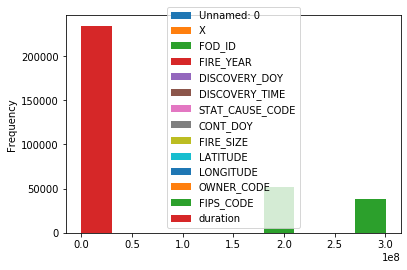

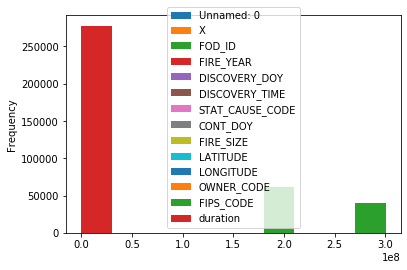

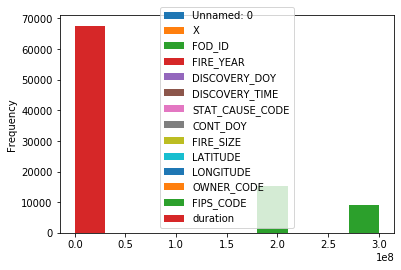

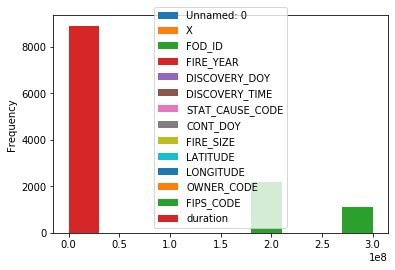

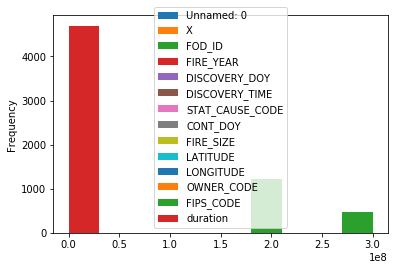

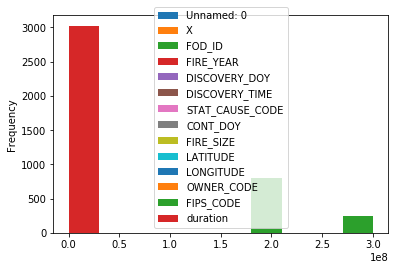

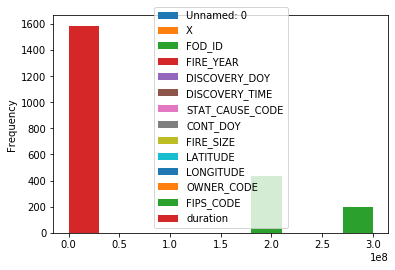

In [149]:
cleanFires.groupby('FIRE_SIZE_CLASS').plot.hist("duration")

In [151]:
X = X.drop(["CONT_DOY"], axis=1)
X.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,OWNER_CODE,FIPS_CODE,STATE_AK,STATE_AL,...,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,2005,33,1300.0,9.0,40.036944,121.005833,5.0,63.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2004,133,845.0,1.0,38.933056,120.404444,5.0,61.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2004,152,1921.0,5.0,38.984167,120.735556,13.0,17.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,180,1600.0,1.0,38.559167,119.913333,5.0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2004,180,1600.0,1.0,38.559167,119.933056,5.0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(418598, 59)
(179400, 59)
(418598, 1)
(179400, 1)


In [160]:
Xr = pd.read_csv("FireDatathon/finalFirescleaned.csv")
Xr.head()

/Users/muthu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,X,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,duration
0,1,0,1,2005,2005-02-02,33,1300,9,Miscellaneous,2005-02-02,...,A,40.036944,-121.005833,5,USFS,CA,63,63,Plumas,0
1,2,1,2,2004,2004-05-12,133,845,1,Lightning,2004-05-12,...,A,38.933056,-120.404444,5,USFS,CA,61,61,Placer,0
2,3,2,3,2004,2004-05-31,152,1921,5,Debris Burning,2004-05-31,...,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17,17,El Dorado,0
3,4,3,4,2004,2004-06-28,180,1600,1,Lightning,2004-07-03,...,A,38.559167,-119.913333,5,USFS,CA,3,3,Alpine,5
4,5,4,5,2004,2004-06-28,180,1600,1,Lightning,2004-07-03,...,A,38.559167,-119.933056,5,USFS,CA,3,3,Alpine,5


In [161]:
Xr.shape

(597998, 22)

In [162]:
y.shape

(597998, 1)

In [163]:
Xr.columns

Index(['Unnamed: 0', 'X', 'FOD_ID', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'duration'],
      dtype='object')

In [164]:
dropcols = ['Unnamed: 0', 'X', 'FOD_ID', 'DISCOVERY_DATE', 'STAT_CAUSE_CODE', 'CONT_DATE', 'CONT_DOY', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'OWNER_CODE', 'COUNTY', 'FIPS_NAME', 'duration']

In [165]:
Xr = Xr.drop(dropcols, axis=1)

In [166]:
Xr.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,FIPS_CODE
0,2005,33,1300,Miscellaneous,40.036944,-121.005833,USFS,CA,63
1,2004,133,845,Lightning,38.933056,-120.404444,USFS,CA,61
2,2004,152,1921,Debris Burning,38.984167,-120.735556,STATE OR PRIVATE,CA,17
3,2004,180,1600,Lightning,38.559167,-119.913333,USFS,CA,3
4,2004,180,1600,Lightning,38.559167,-119.933056,USFS,CA,3


In [167]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, y, test_size=0.3)
print(Xr_train.shape)
print(Xr_test.shape)
print(yr_train.shape)
print(yr_test.shape)

(418598, 9)
(179400, 9)
(418598, 1)
(179400, 1)


In [168]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 10)
forest = forest.fit(Xr_train, yr_train)
ypred_forest = forest.predict(Xr_test)
fcfm = confusion_matrix(yr_test, ypred_forest)
fprobs = forest.predict_proba(Xr_test)[:,1]
print(fcfm)
print("Specificity: " + str(calcSpec(fcfm)))
print("Sensitivity: " + str(calcSens(fcfm)))
print ("AUC: " + str(roc_auc_score(yr_test, fprobs)))

ValueError: could not convert string to float: 'Miscellaneous'

In [170]:
features = pd.DataFrame({'features': X_train.columns, 'coefs': forest.feature_importances_})

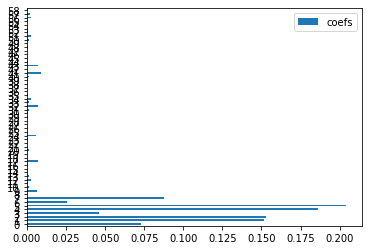

In [175]:
features.plot(kind='barh')

In [176]:
sort_features = features.sort_values(by=['coefs'], ascending = False)

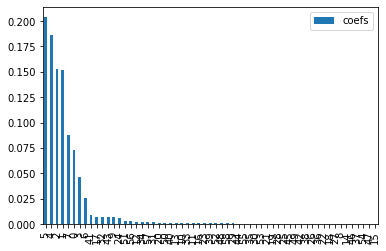

In [177]:
sort_features.plot.bar()

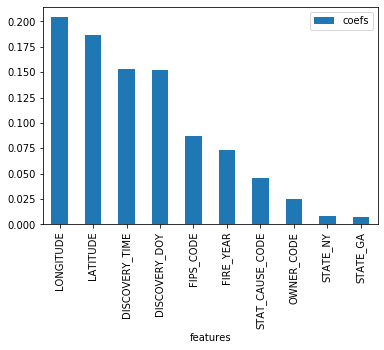

In [181]:
sort_features.iloc[:10].plot.bar(x = 'features')